In [1]:
import numpy as np
import matplotlib.pyplot as plt

Mass present is 13.0692
Mass present is 756.0376


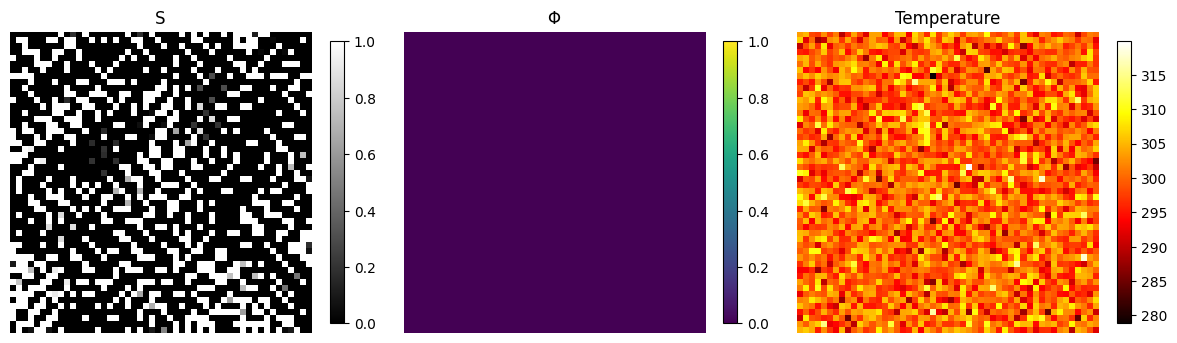

In [122]:
N = 50
S = np.maximum(0, np.random.rand(N, N) - 0.9)
T = np.random.normal(loc=300, scale=5, size=(N, N))  #Temperature
Φ = np.zeros((N, N)) #Organization
ϵ = 3 #mass threshold at which a unit is formed
m = np.sum(S)
print(f"Mass present is {m:.4f}")


def diffusion(state, T):
    D = 1.5 * T #constant for analogue of Boltzmann's

    #get laplacian
    grad_x, grad_y = np.gradient(state)
    grad_xx = np.gradient(grad_x, axis = 0)
    grad_yy = np.gradient(grad_y, axis = 1)
    laplacian = grad_xx + grad_yy
    state += D * laplacian + state * (1 - state)
    state = np.clip(state, 0, 1)

    return state

S_new = diffusion(S, T)
m = np.sum(S_new)
print(f"Mass present is {m:.4f}")

plt.figure(figsize=(12, 5))
ax1 = plt.subplot(1, 3, 1)
plt.title("S")
plt.axis("off")
im1 = plt.imshow(S_new, cmap="gray")
plt.colorbar(im1, ax=ax1, shrink=0.6)

ax2 = plt.subplot(1, 3, 2)
plt.title("Φ")
plt.axis("off")
im2 = plt.imshow(Φ, cmap="viridis", vmin = 0, vmax = 1)
plt.colorbar(im2, ax=ax2, shrink=0.6)

ax3 = plt.subplot(1, 3, 3)
plt.title("Temperature")
plt.axis("off")
im3 = plt.imshow(T, cmap="hot")
plt.colorbar(im3, ax=ax3, shrink=0.6)

plt.tight_layout()
plt.show()